<a href="https://colab.research.google.com/github/Auryvilia/Komputer_Grafik/blob/main/Latihan_KeyPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


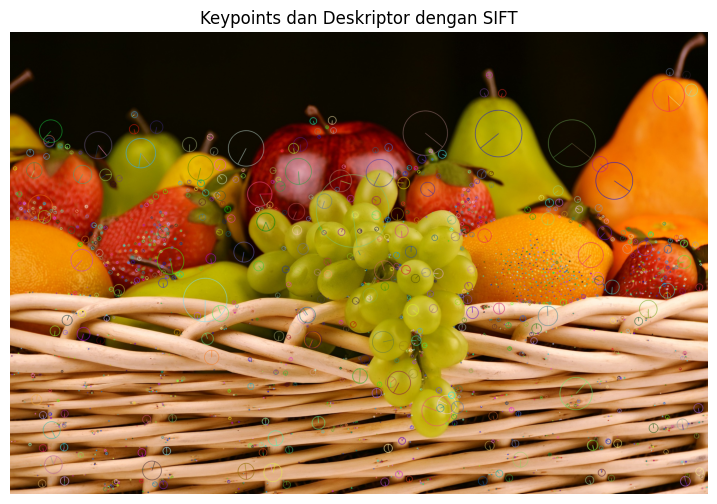

Jumlah keypoints yang terdeteksi: 1990
Bentuk deskriptor: (1990, 128)


In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

# Mount Google Drive untuk membaca file
drive.mount('/content/drive')

# Membaca dan mengubah gambar menjadi grayscale
image_path = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/fruit.jpg'
image = cv2.imread(image_path)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Membuat objek SIFT
sift = cv2.SIFT_create()

# 1. Deteksi keypoints dan Descriptors menggunakan SIFT
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Gambar keypoints pada gambar asli
sift_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Menampilkan hasil
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Keypoints dan Deskriptor dengan SIFT")
plt.show()

# Informasi tambahan tentang keypoints dan deskriptor
print(f"Jumlah keypoints yang terdeteksi: {len(keypoints)}")
print(f"Bentuk deskriptor: {descriptors.shape}")

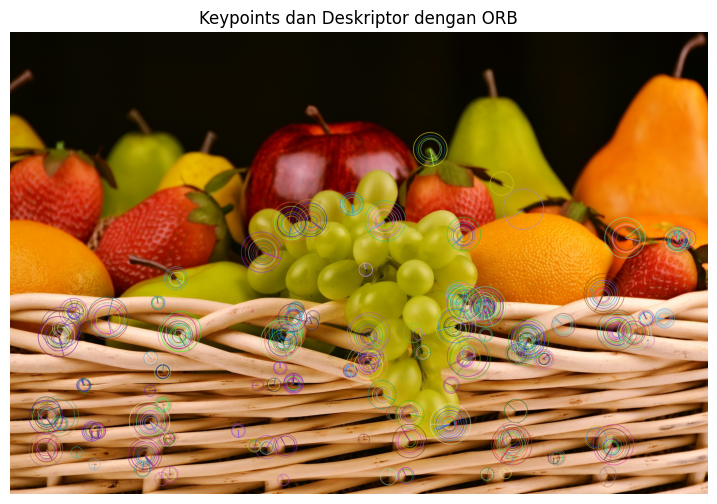

Jumlah keypoints yang terdeteksi: 500
Bentuk deskriptor: (500, 32)


In [ ]:
# Membuat objek ORB
orb = cv2.ORB_create(nfeatures=500) # Menggunakan maksimal 500 keypoints

# 1. Deteksi keypoints menggunakan FAST (bagian ORB)
keypoints = orb.detect(gray, None)

# 2. Deskripsi fitur menggunakan BRIEF (bagian ORB)
keypoints, descriptors = orb.compute(gray, keypoints)

# Gambar keypoints pada gambar asli
orb_image = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Menampilkan hasil
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Keypoints dan Deskriptor dengan ORB")
plt.show()

# Informasi tambahan tentang keypoints dan deskriptor
print(f"Jumlah keypoints yang terdeteksi: {len(keypoints)}")
print(f"Bentuk deskriptor: {descriptors. shape}")

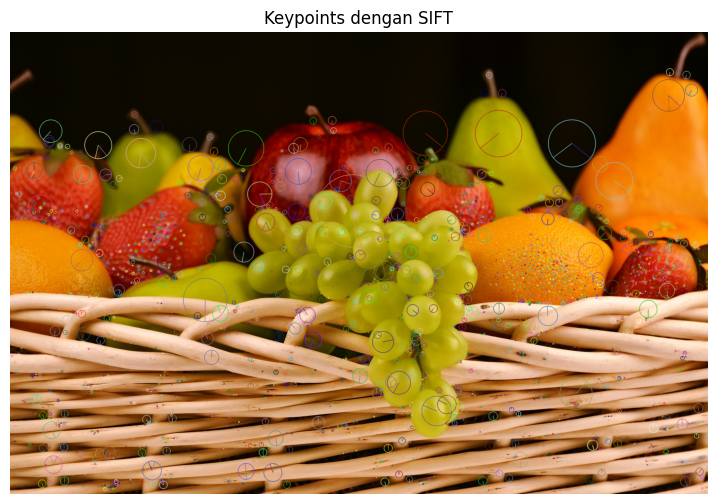

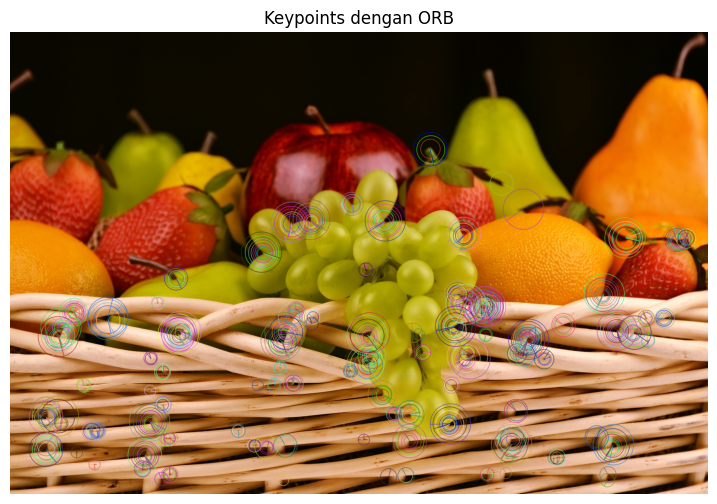

Jumlah keypoints yang terdeteksi (SIFT): 1990
Bentuk deskriptor (SIFT): (1990, 128)
Jumlah keypoints yang terdeteksi (ORB): 500
Bentuk deskriptor (ORB): (500, 32)


In [ ]:
#-----------------------------------------------
# 1. Deteksi dan Deskripsi dengan SIFT
#-----------------------------------------------

# Membuat objek SIFT
sift = cv2.SIFT_create()

# Deteksi keypoints dan descriptors dengan SIFT
keypoints_sift, descriptors_sift = sift.detectAndCompute(gray, None)

# Menggambar keypoints pada gambar dengan SIFT
sift_image = cv2.drawKeypoints(image, keypoints_sift, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#-----------------------------------------------
# 2. Deteksi dan Deskripsi dengan ORB
#-----------------------------------------------

# Membuat objek ORB
orb = cv2.ORB_create(nfeatures=500) # Menggunakan maksimal 500 keypoints

# Deteksi keypoints menggunakan FAST
keypoints_orb = orb.detect(gray, None)

# Deskripsi fitur menggunakan BRIEF
keypoints_orb, descriptors_orb = orb.compute(gray, keypoints_orb)

# Menggambar keypoints pada gambar dengar| ORB
orb_image = cv2.drawKeypoints(image, keypoints_orb, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


#----------------------------------------------
# Menampilkan Hasill
#----------------------------------------------

#Menampilkan gambar hasil deteksi keypoints dengan SIFT
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(sift_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Keypoints dengan SIFT")
plt.show()

# Menampilkan gambar hasil deteksi keypoints dengan ORB
plt.figure(figsize=(10, 6))
plt.imshow(cv2.cvtColor(orb_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Keypoints dengan ORB")
plt.show()


# --------------------------------------------------------
# Informasi Tambahan tentang keypoints dan deskriptor
# --------------------------------------------------------

print(f"Jumlah keypoints yang terdeteksi (SIFT): {len(keypoints_sift)}")
print(f"Bentuk deskriptor (SIFT): {descriptors_sift.shape}")

print(f"Jumlah keypoints yang terdeteksi (ORB): {len(keypoints_orb)}")
print(f"Bentuk deskriptor (ORB): {descriptors_orb.shape}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


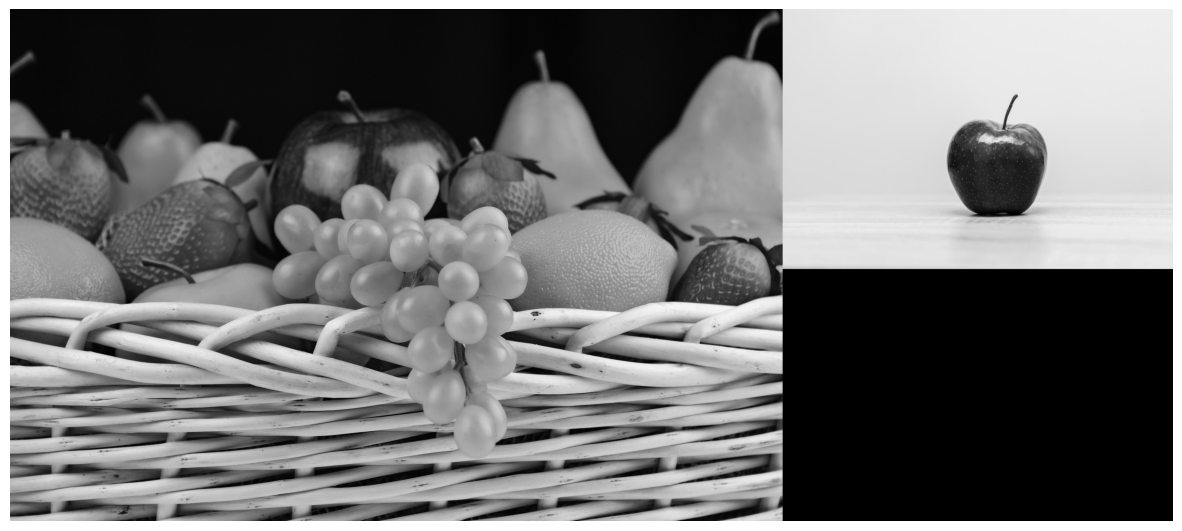

In [ ]:
from google.colab import drive
import cv2
import matplotlib.pyplot as plt

drive.mount('/content/drive')

#path untuk gambar
image_path1 = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/fruit.jpg'
image_path2 = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/red-apple-on-table.jpg'

# Membaca dan mengubah gambar menjadi grayscale
image1 = cv2.imread(image_path1, cv2. IMREAD_GRAYSCALE)
image2 = cv2.imread(image_path2, cv2. IMREAD_GRAYSCALE)

# Deteksi dan deskripsi fitur menggunakan SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(image1, None)
keypoints2, descriptors2 = sift.detectAndCompute(image2, None)

# Pencocokan fitur menggunakan BFMatcher
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
matches = bf.knnMatch(descriptors1, descriptors2, k=2)

# Menggunakan Ratio Test umtuk menyaring hasil pencocokan
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * m.distance: # Ratio 0.7 untuk membandingkan jarak terbaik kedua
          good_matches.append(m)

# Gambar hasil pencocokan
match_img = cv2.drawMatches(
    image1, keypoints1, image2, keypoints2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Tampilkam hasit
plt.figure(figsize=(15, 10))
plt.imshow(match_img, cmap='gray')
plt.axis('off')
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


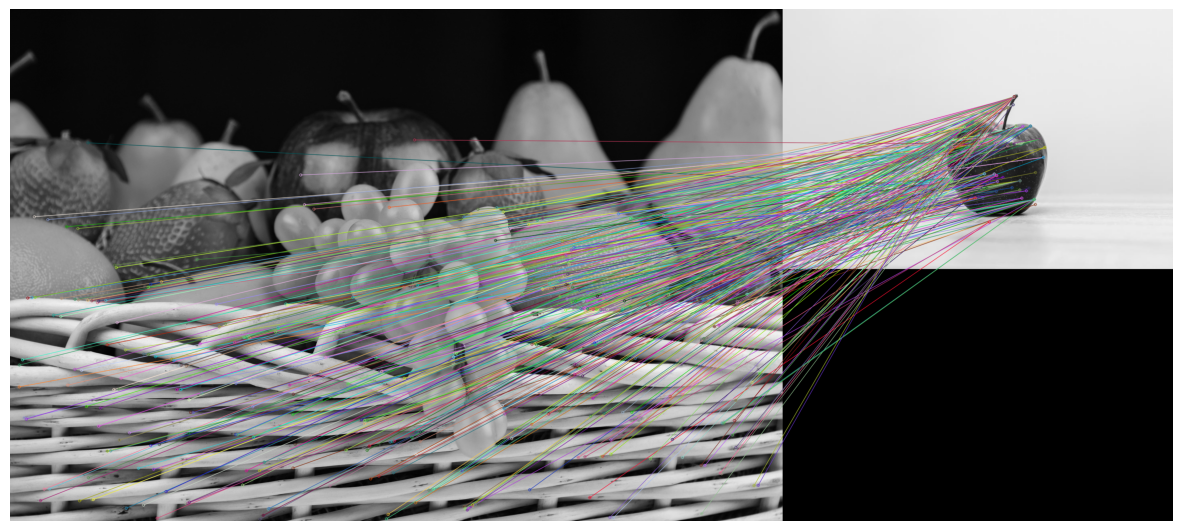

In [ ]:
# ORB + FLANN

from google.colab import drive
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Membaca dan mengubah gambar menjadi grayscale
drive.mount('/content/drive')
image_path1 = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/fruit.jpg'
image_path2 = '/content/drive/MyDrive/Kuliah/Semester 5/Komputer Grafik/red-apple-on-table.jpg'
img1= cv2.imread(image_path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(image_path2, cv2. IMREAD_GRAYSCALE)

# Deteksi dan deskripsi fitur menggunakan SIFT
sift = cv2.SIFT_create()
keypoints1, descriptors1 = sift.detectAndCompute(img1, None)
keypoints2, descriptors2 = sift.detectAndCompute(img2, None)

# Convert descriptors to CV_32F (untuk FLANN)
descriptors1 = descriptors1.astype(np.float32)
descriptors2 = descriptors2.astype(np.float32)

# Pencocokan fitur menggunakan FLANN
index_params = {'algorithm': 1, 'trees': 5} # FLANN menggunakan algoritma K-D Tree
search_params = {'checks': 50} # Jumlah iterasi untuk mencari pasangan terbaik
matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches = matcher.knnMatch(descriptors1, descriptors2, k=2)

# Menggunakan Ratio Test untuk menyaring hasil pencocokan
good_matches = []
for m, m in matches:
    if m.distance < 0.7 * n.distance: # Ratio 0.7 untuk menbandingkan jarak terbaik kedua
          good_matches.append(m)

# Gambar hasil pencocokan
match_img = cv2.drawMatches(
    img1, keypoints1, img2, keypoints2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

# Tampilkan hasil
plt.figure(figsize=(15, 10))
plt.imshow(match_img, cmap='gray')
plt.axis('off')
plt.show()